### Import Libraries

#### Dataset link : https://www.kaggle.com/code/junseokoh09/student-performance-factors-eda-ml#notebook-container

### Dataset Description

-    Hours_Studied: Number of hours spent studying per week,
-    Attendance: Percentage of classes attended,
-    Parental_Involvement: Level of parental involvement in the student's education (Low, Medium, High),
-    Access_to_Resources: Availability of educational resources (Low, Medium, High),
-    Extracurricular_Activities: Participation in extracurricular activities (Yes, No),
-    Sleep_Hours: Average number of hours of sleep per night,
-    Previous_Scores: Scores from previous exams,
-    Motivation_Level: Student's level of motivation (Low, Medium, High),
-    Internet_Access: Availability of internet access (Yes, No),
-    Tutoring_Sessions: Number of tutoring sessions attended per month,
-    Family_Income: Family income level (Low, Medium, High),
-    Teacher_Quality: Quality of the teachers (Low, Medium, High),
-    School_Type: Type of school attended (Public, Private),
-    Peer_Influence: Influence of peers on academic performance (Positive, Neutral, Negative),
-    Physical_Activity: Average number of hours of physical activity per week,
-    Learning_Disabilities: Presence of learning disabilities (Yes, No),
-    Parental_Education_Level: Highest education level of parents (High School, College, Postgraduate),
-    Distance_from_Home: Distance from home to school (Near, Moderate, Far),
-    Gender: Gender of the student (Male, Female),
-    Exam_Score: Final exam score

#### Target: Predicting Exam_Scores according to the student background informations and people who are in around students

### Import Libraries

In [1]:
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor

### Dataset Analyze Section

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
# Get column names with their data types
column_data_types = df.dtypes

# Print column names and data types
print("Columns and their Data Types:")
print(column_data_types)

Columns and their Data Types:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [4]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


From this can be understand the distribution of all numerical columns

#### 1. Handle Missing values

In [6]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df.fillna("Unknown", inplace=True)

Adding "unknown" for all null values, because this having categorical values

In [8]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [9]:
# Check whether exam score values larger than 100
df[df["Exam_Score"] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [10]:
df['Exam_Score'] = df['Exam_Score'].replace(101, 100)

#### 2. Identify Data Distributions

#### Identify Distribution of categorical variables

In [11]:
# Select only categorical columns
cat_cols = df.select_dtypes(include='O')

# Layout setup
cols = 2
rows = (len(cat_cols.columns) + 1) // cols

# Create subplots
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=cat_cols.columns)

# Plot each categorical column
for i, column in enumerate(cat_cols.columns):
    row = (i // cols) + 1
    col_pos = (i % cols) + 1

    count_df = df[column].value_counts().reset_index()
    count_df.columns = [column, 'count']

    fig.add_trace(
        go.Bar(
            x=count_df[column],
            y=count_df['count'],
            name=column,
            text=count_df['count'],
            textposition='auto'
        ),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(
    title_text="Distribution of Each Categorical Feature",
    height=300 * rows,
    width=900,
    showlegend=False,
    template='plotly_white'
)

fig.show()


- Above information depicts the class imbalance and how to deviate the categorical variables between their own labels

#### Identify Distribution of numerical variables

In [12]:
# Select numeric columns (excluding object types)
num_cols = df.select_dtypes(exclude='O')

# Layout setup
cols = 2
rows = (len(num_cols.columns) + 1) // cols

# Create subplots
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=num_cols.columns)

# Add line plots for each numeric column
for i, column in enumerate(num_cols.columns):
    row = (i // cols) + 1
    col_pos = (i % cols) + 1

    count_df = df[column].value_counts().reset_index()
    count_df.columns = [column, 'count']
    count_df = count_df.sort_values(by=column)

    fig.add_trace(
        go.Scatter(
            x=count_df[column],
            y=count_df['count'],
            mode='lines',
            name=column,
            line=dict(shape='spline'),
            fill='tozeroy'
        ),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(
    title_text="Distribution of Each Numerical Feature",
    height=300 * rows,
    width=1000,
    showlegend=False,
    template='plotly_white'
)

fig.show()

##### Numerical Feature Distributions - Summary
- Hours_Studied:

    - Bell-shaped curve.

    - Indicates most students study around 20 hours/week, fewer study very little or a lot.

- Attendance:

    - Flat distribution.

    - Attendance is widely spread between 60% to 100% with no specific mode.

- Sleep_Hours:

    - Normal distribution.

    - Most students sleep between 6 to 8 hours.

- Previous_Scores:

    - Fairly uniform.

    - Students have a wide range of past scores, but mostly between 50 to 100.

- Tutoring_Sessions:

    - Right-skewed.

    - Most students attend 0–2 sessions per month; very few attend more.

- Physical_Activity:

    - Bell-shaped curve.

    - Most students are active for around 2–4 hours/week.

- Exam_Score:

    - Slight left-skew.

    - Most students score between 65 to 70, very few score above 80.

#### Data Distribution Between "Exam_Score" and Other variables

##### 1 . Correlation with Numerical Features
- The most important features influencing Exam_Score are Attendance and Hours_Studied, followed by Previous_Scores and Tutoring_Sessions. These variables can be prioritized in predictive modeling or further analysis.

Correlation of numerical features with Exam_Score:
Exam_Score           1.000000
Attendance           0.581205
Hours_Studied        0.445558
Previous_Scores      0.175089
Tutoring_Sessions    0.156466
Physical_Activity    0.027832
Sleep_Hours         -0.017000
Name: Exam_Score, dtype: float64


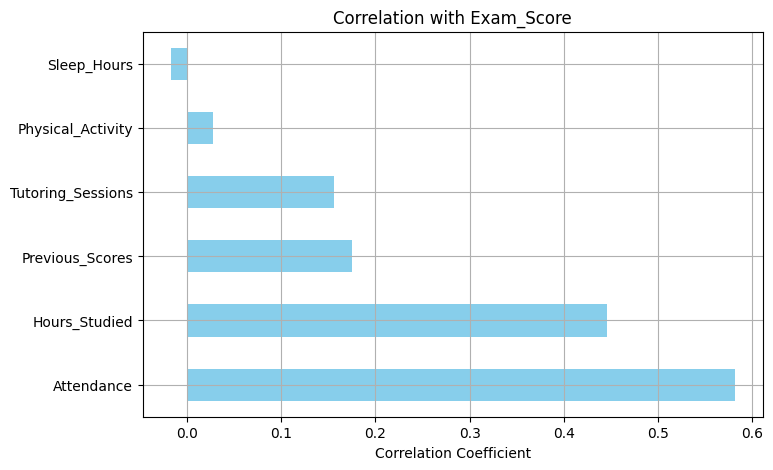

In [13]:
# Get numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with Exam_Score
correlations = num_cols.corr()['Exam_Score'].sort_values(ascending=False)

# Display correlations
print("Correlation of numerical features with Exam_Score:")
print(correlations)

# Optional: Visualize as bar plot
plt.figure(figsize=(8, 5))
correlations.drop('Exam_Score').plot(kind='barh', color='skyblue')
plt.title('Correlation with Exam_Score')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()

##### 2. Scatter Plots (Numerical Features vs Exam Score)
- These plots support earlier correlation findings. Attendance and Hours_Studied exhibit strong positive associations with Exam_Score, while Previous_Scores and Tutoring_Sessions have moderate effects. Physical Activity and Sleep Hours, however, show minimal predictive value visually.

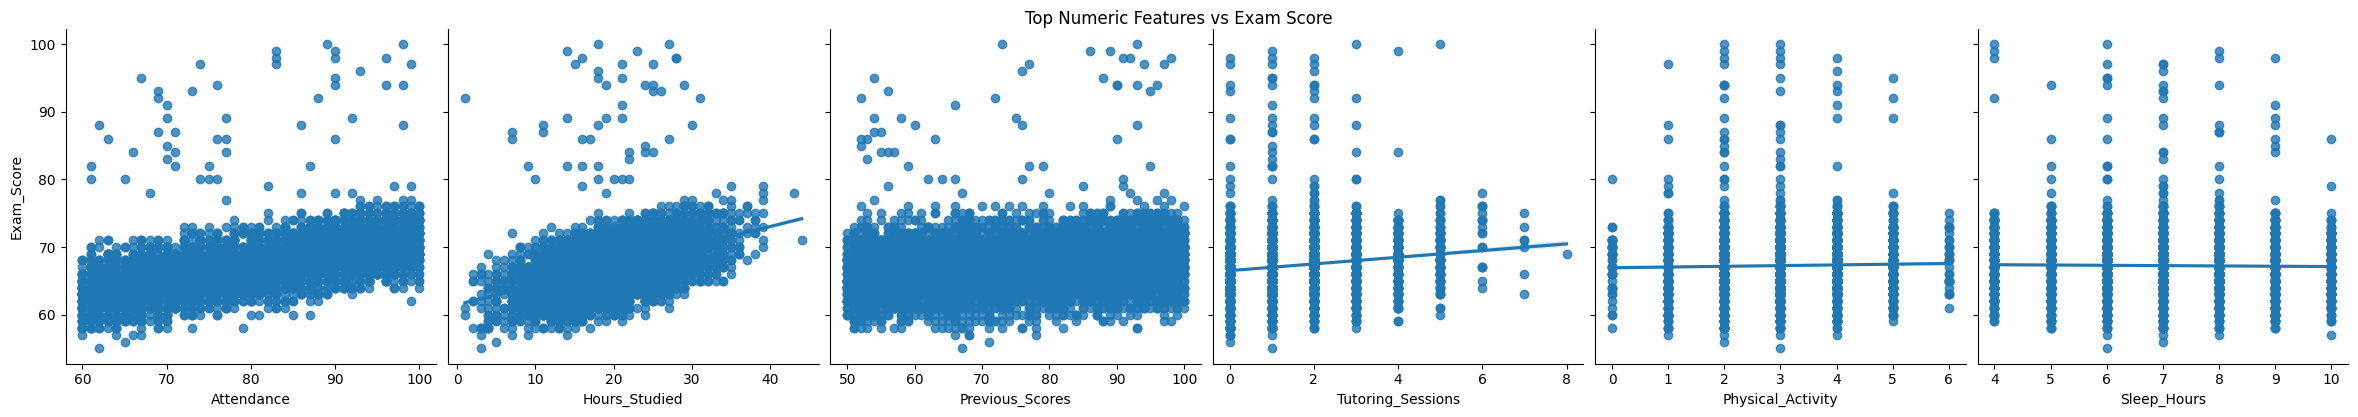

In [14]:
# Scatter plots for top correlated features
top_features = correlations.drop('Exam_Score').abs().sort_values(ascending=False).head(6).index

sns.pairplot(df, x_vars=top_features, y_vars='Exam_Score', kind='reg', height=4)
plt.suptitle("Top Numeric Features vs Exam Score", y=1.02)
plt.show()


#####  3. Box Plots for Categorical Features

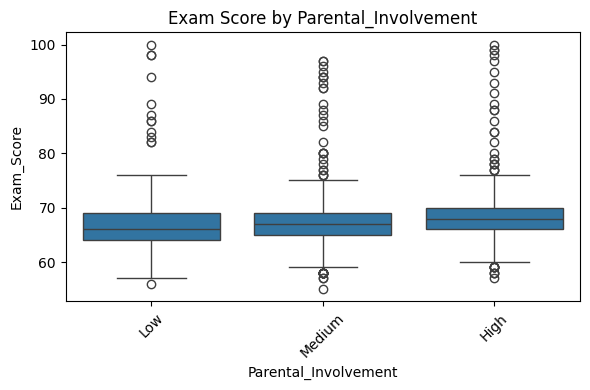

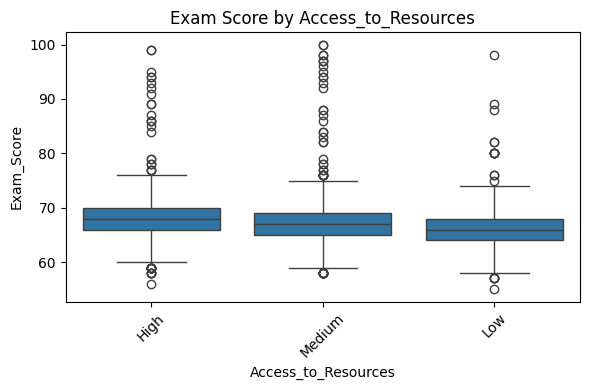

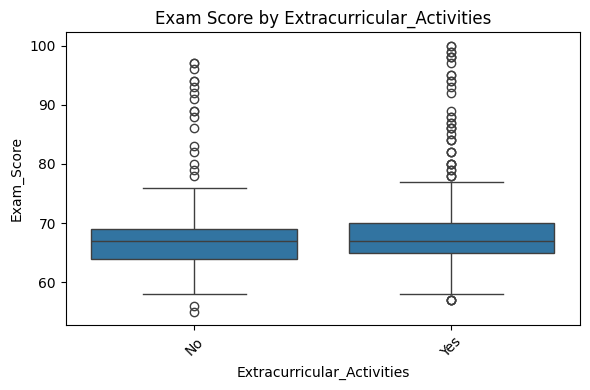

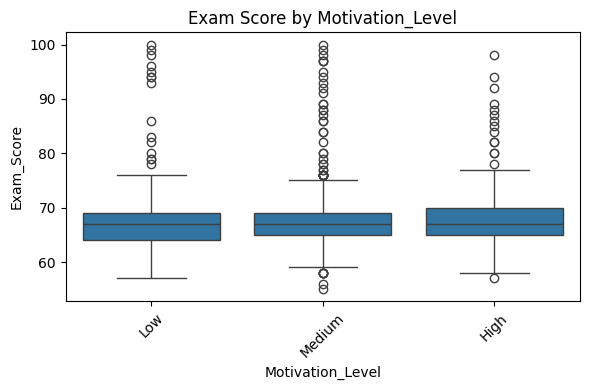

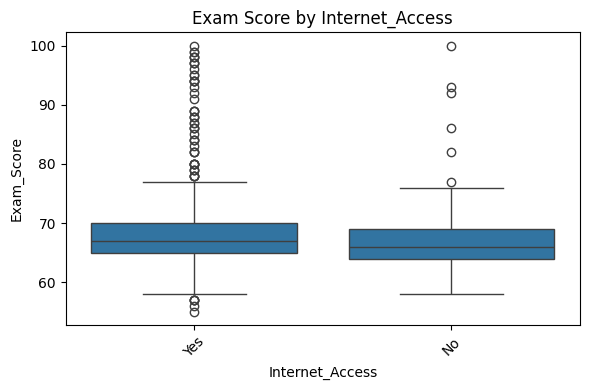

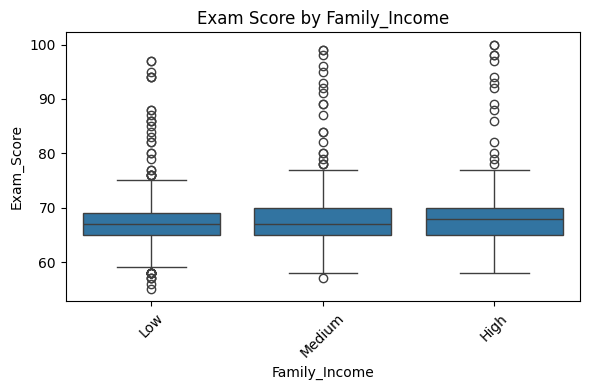

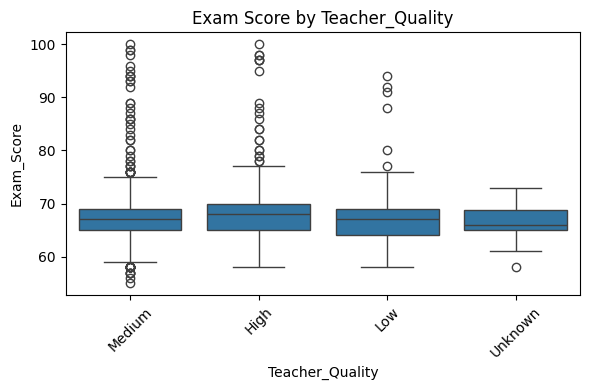

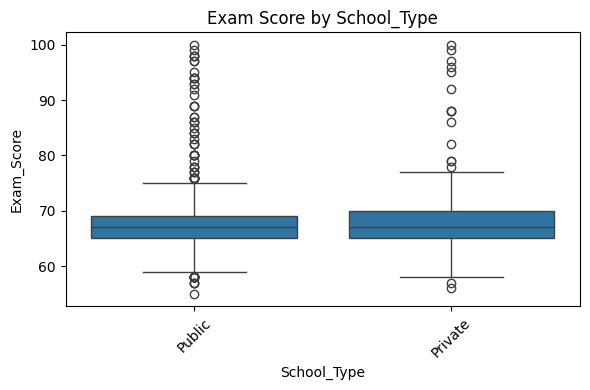

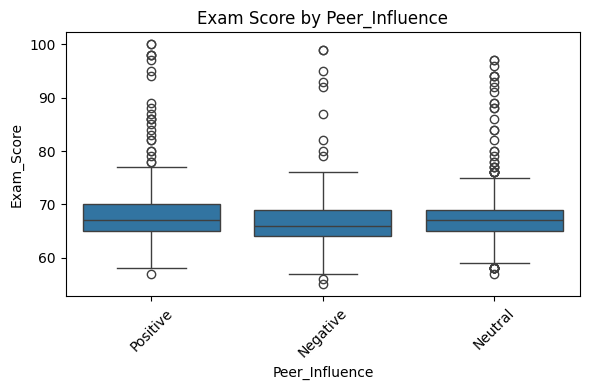

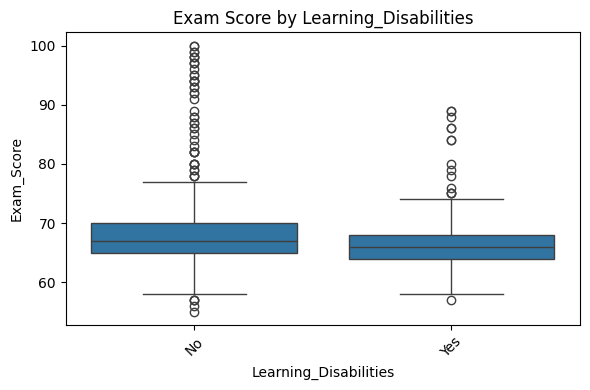

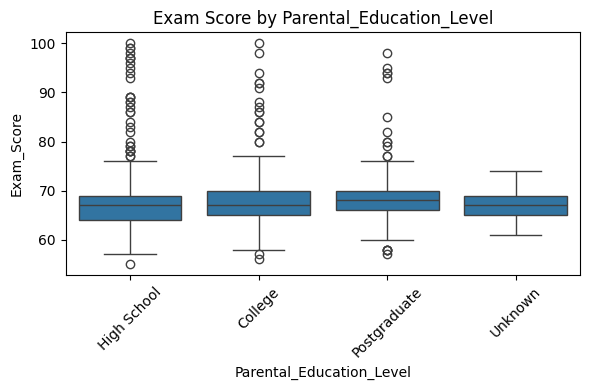

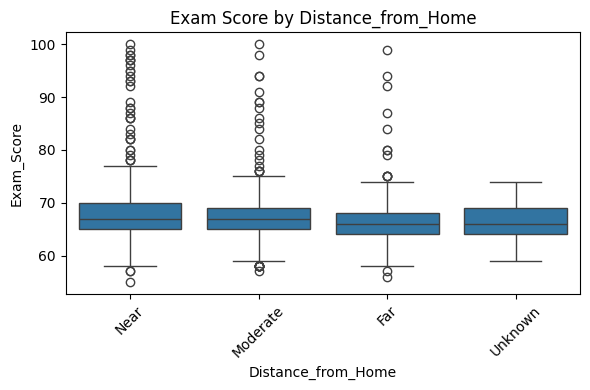

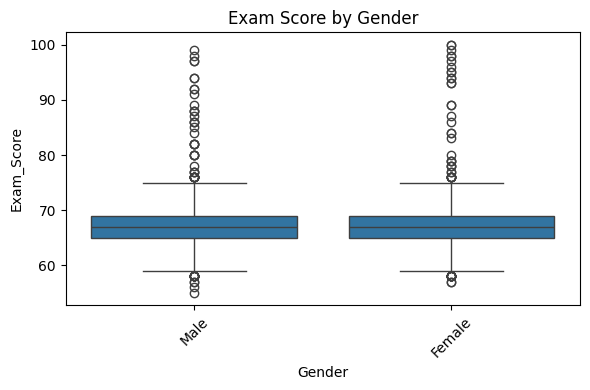

In [15]:
# Select categorical columns
cat_cols = df.select_dtypes(include='O').columns

# Plot box plots for each categorical feature vs Exam Score
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], y=df['Exam_Score'])
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##### 4. ANOVA Test (for statistical significance of categorical features)
- If p < 0.5, these features are statistically okay with the target variable "Exam_Score"

In [16]:
from scipy.stats import f_oneway

print("ANOVA test results:")
for col in cat_cols:
    groups = [df[df[col] == level]['Exam_Score'].dropna() for level in df[col].unique()]
    if len(groups) > 1:
        f_val, p_val = f_oneway(*groups)
        print(f"{col}: F = {f_val:.2f}, p = {p_val:.4f}")


ANOVA test results:
Parental_Involvement: F = 84.61, p = 0.0000
Access_to_Resources: F = 98.08, p = 0.0000
Extracurricular_Activities: F = 27.48, p = 0.0000
Motivation_Level: F = 25.77, p = 0.0000
Internet_Access: F = 17.65, p = 0.0000
Family_Income: F = 29.77, p = 0.0000
Teacher_Quality: F = 13.77, p = 0.0000
School_Type: F = 0.52, p = 0.4709
Peer_Influence: F = 34.05, p = 0.0000
Learning_Disabilities: F = 48.16, p = 0.0000
Parental_Education_Level: F = 24.48, p = 0.0000
Distance_from_Home: F = 19.29, p = 0.0000
Gender: F = 0.03, p = 0.8717


#### MultiVariate Analysis

##### 1. Study Hours & Attendance

- Students who both study more and attend more classes (bright yellow dots on the top right)
   tend to achieve the highest exam scores.
- High attendance amplifies the positive effect of study time.
- Some students with low study hours but high attendance still perform reasonably well,
  suggesting that class participation is valuable.

##### This multi-dimensional analysis highlights that academic performance is not influenced by a single factor, but rather by the combined effect of multiple habits and behaviors.It supports educators in understanding and promoting balanced learning strategies.

In [17]:
fig = px.scatter(df, 
                 x="Hours_Studied", 
                 y="Exam_Score", 
                 color="Attendance",
                 color_continuous_scale="Viridis", 
                 title="Study Hours and Attendance on Exam")

fig.update_layout(width=600, height=500,template='plotly_white',title_x=0.5)
fig.show()

atg = df.groupby("Attendance")["Exam_Score"].mean()
print(atg)

Attendance
60     62.413793
61     63.384146
62     63.756579
63     64.361290
64     63.884615
65     63.905063
66     64.537931
67     64.626316
68     65.147059
69     65.123529
70     65.527950
71     65.611111
72     65.694611
73     65.952381
74     66.272727
75     66.288591
76     66.886486
77     66.668478
78     66.890909
79     66.828571
80     67.088757
81     67.232143
82     67.341040
83     67.968153
84     67.742857
85     67.883562
86     68.655629
87     68.741722
88     68.909677
89     69.104938
90     70.012821
91     69.417143
92     69.727273
93     69.820359
94     69.588889
95     70.067485
96     70.571429
97     70.378882
98     70.679144
99     70.889610
100    70.765432
Name: Exam_Score, dtype: float64


##### 2. Parental Involvement & Access to Resources
- This code generates a grouped box plot to analyze how Parental Involvement and Access to Resources together influence Exam Scores. It helps compare score distributions across different combinations of involvement levels and resource availability, revealing how supportive environments impact academic performance.

In [18]:
fig = px.box(df, 
             x="Parental_Involvement", 
             y="Exam_Score", 
             color="Access_to_Resources", 
             category_orders={"Parental_Involvement": ["Low", "Medium", "High"], 
                              "Access_to_Resources": ["Poor", "Fair", "Good"]},
             color_discrete_sequence=px.colors.qualitative.D3,
             title="Parental Involvement & Access to Resources on Exam")

fig.update_layout(width=700, height=600,template='plotly_white',title_x=0.5)
fig.show()

##### 3. Tutoring Sessions & Family Income
- The plot helps examine how the number of tutoring sessions and family income levels relate to students' exam performance. By plotting in 3D and color-coding by tutoring frequency, it reveals patterns and clusters that may suggest how economic and academic support systems jointly influence outcomes.

In [19]:
df['Tutoring_Sessions'] = df['Tutoring_Sessions'].astype('category')

fig = px.scatter_3d(df, 
                    x="Tutoring_Sessions", 
                    y="Family_Income", 
                    z="Exam_Score", 
                    color="Tutoring_Sessions", 
                    color_discrete_sequence=px.colors.sequential.Blues, 
                    title="Tutoring Sessions & Family Income on Exam")

fig.update_layout(width=700, height=600, template='plotly_dark', title_x=0.5)
fig.show()

##### 4. Motivation Level & Peer Influence
- This treemap visualizes the combined influence of Motivation Level and Peer Influence on Exam Scores, helping identify which combinations contribute most to overall performance.

In [20]:
fig = px.treemap(df, 
                 path=["Motivation_Level", "Peer_Influence"], 
                 values="Exam_Score", 
                 color="Exam_Score", 
                 color_continuous_scale='Purples',
                 title="Motivation Level & Peer Influence on Exam")

fig.update_layout(width=700, height=600, template='ggplot2', title_x=0.5)
fig.show()

pm = pd.crosstab(df["Motivation_Level"], df["Peer_Influence"])
print(pm)

Peer_Influence    Negative  Neutral  Positive
Motivation_Level                             
High                   286      500       533
Low                    417      737       783
Medium                 674     1355      1322


##### 5. Parental Education Level & Learning Disabilities
- This reveals how parental educational background may influence student performance, and whether the presence of learning disabilities causes variation in scores within each educational group.

In [21]:
fig = px.box(df, 
             x="Parental_Education_Level", 
             y="Exam_Score", 
             color="Learning_Disabilities", 
             color_discrete_sequence=px.colors.qualitative.D3,
             category_orders={"Parental_Education_Level": sorted(df["Parental_Education_Level"].unique())},
             title="Parental Education Level & Learning Disabilities on Exam")

fig.update_layout(
    height=600, 
    width=800, 
    template='plotly_white', 
    title_x=0.5
)
fig.update_layout(width=700, height=600,template='plotly_white',title_x=0.5)
fig.show()

##### 6. School Type & Teacher Quality
- It helps analyze how both the type of school and the quality of teaching affect students' academic performance, revealing variations in score distributions, medians, and outliers within each combination.

In [22]:
fig = px.violin(df, 
                x="School_Type", 
                y="Exam_Score", 
                color="Teacher_Quality", 
                box=True, 
                title="School Type & Teacher Quality on Exam",
               color_discrete_sequence=px.colors.diverging.BrBG)

fig.update_layout(
    height=600, 
    width=800, 
    template='plotly_white', 
    title_x=0.5
)
fig.update_layout(width=800, height=600,template='plotly_white',title_x=0.5)
fig.show()

##### 7. Physical Activity & Sleep Hours
- It helps identify correlations or clustering patterns between lifestyle habits and academic performance, allowing us to visually detect whether physical activity or sleep has any noticeable impact on exam outcomes.

In [23]:
fig = px.scatter_matrix(df, 
                        dimensions=["Physical_Activity", "Sleep_Hours", "Exam_Score"], 
                        color="Exam_Score", 
                        color_continuous_scale="Cividis")
fig.update_layout(title="Physical Activity, Sleep Hours on Exam")
fig.update_layout(width=800, height=600,template='plotly_white',title_x=0.5)
fig.show()

### Data Preprocessing & Check Outliers

##### 1. Data Encoding
- Ordinal Encoding: Parental_Involvement, Motivation_Level, Access_to_Resources, Teacher_Quality, Family_Income, Parental_Education_Level, Distance_from_Home
- Binary Encoding: Internet_Access, Extracurricular_Activities, Learning_Disabilities, Gender
- Label Encoding with Custom Meaning: School_Type, Peer_Influence

We are not Use One hot encoding becuase of dimentionality reduction and reduce the complexity using reduce the number of columns which used in dataset. Then, Label Encoding we use as custom way, becuase some variable should be assigned priority based numbers according to the invlovement and importancy for the model.

In [24]:
Parental_Involvement_mapping = {'Low':1,'Medium':2,'High':3}
Access_to_Resources_mapping = {'Low':1,'Medium':2,'High':3}
Extracurricular_Activities_mapping = {'No':0, 'Yes':1}
Motivation_Level_mapping = {'Low':1,'Medium':2,'High':3}
Internet_Access_mapping = {'No':0, 'Yes':1}
Family_Income_mapping = {'Low':1,'Medium':2,'High':3}
Teacher_Quality_mapping = {'Unknown':0,'Low':1,'Medium':2,'High':3}
School_Type_mapping = {'Public':1,'Private':2}
Peer_Influence_mapping = {'Positive':1,'Neutral':0,'Negative':-1}
Learning_Disabilities_mapping = {'No':0, 'Yes':1}
Parental_Education_Level_mapping = {'Unknown':0,'High School':1,'College':2,'Postgraduate':3}
Distance_from_Home_mapping = {'Unknown':0,'Near':1,'Moderate':2,'Far':3}
Gender_mapping = {"Male":0,"Female":1}


df["Parental_Involvement"] = df["Parental_Involvement"].map(Parental_Involvement_mapping)
df["Access_to_Resources"] = df["Access_to_Resources"].map(Access_to_Resources_mapping)
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map(Extracurricular_Activities_mapping)
df["Motivation_Level"] = df["Motivation_Level"].map(Motivation_Level_mapping)
df["Internet_Access"] = df["Internet_Access"].map(Internet_Access_mapping)
df["Family_Income"] = df["Family_Income"].map(Family_Income_mapping)
df["Teacher_Quality"] = df["Teacher_Quality"].map(Teacher_Quality_mapping)
df["School_Type"] = df["School_Type"].map(School_Type_mapping)
df["Peer_Influence"] = df["Peer_Influence"].map(Peer_Influence_mapping)
df["Learning_Disabilities"] = df["Learning_Disabilities"].map(Learning_Disabilities_mapping)
df["Parental_Education_Level"] = df["Parental_Education_Level"].map(Parental_Education_Level_mapping )
df["Distance_from_Home"] = df["Distance_from_Home"].map(Distance_from_Home_mapping)
df["Gender"] = df["Gender"].map(Gender_mapping)

In [25]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,0,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,-1,4,0,2,2,1,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,0,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,0,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,1,70


##### 2. Checking Outliers

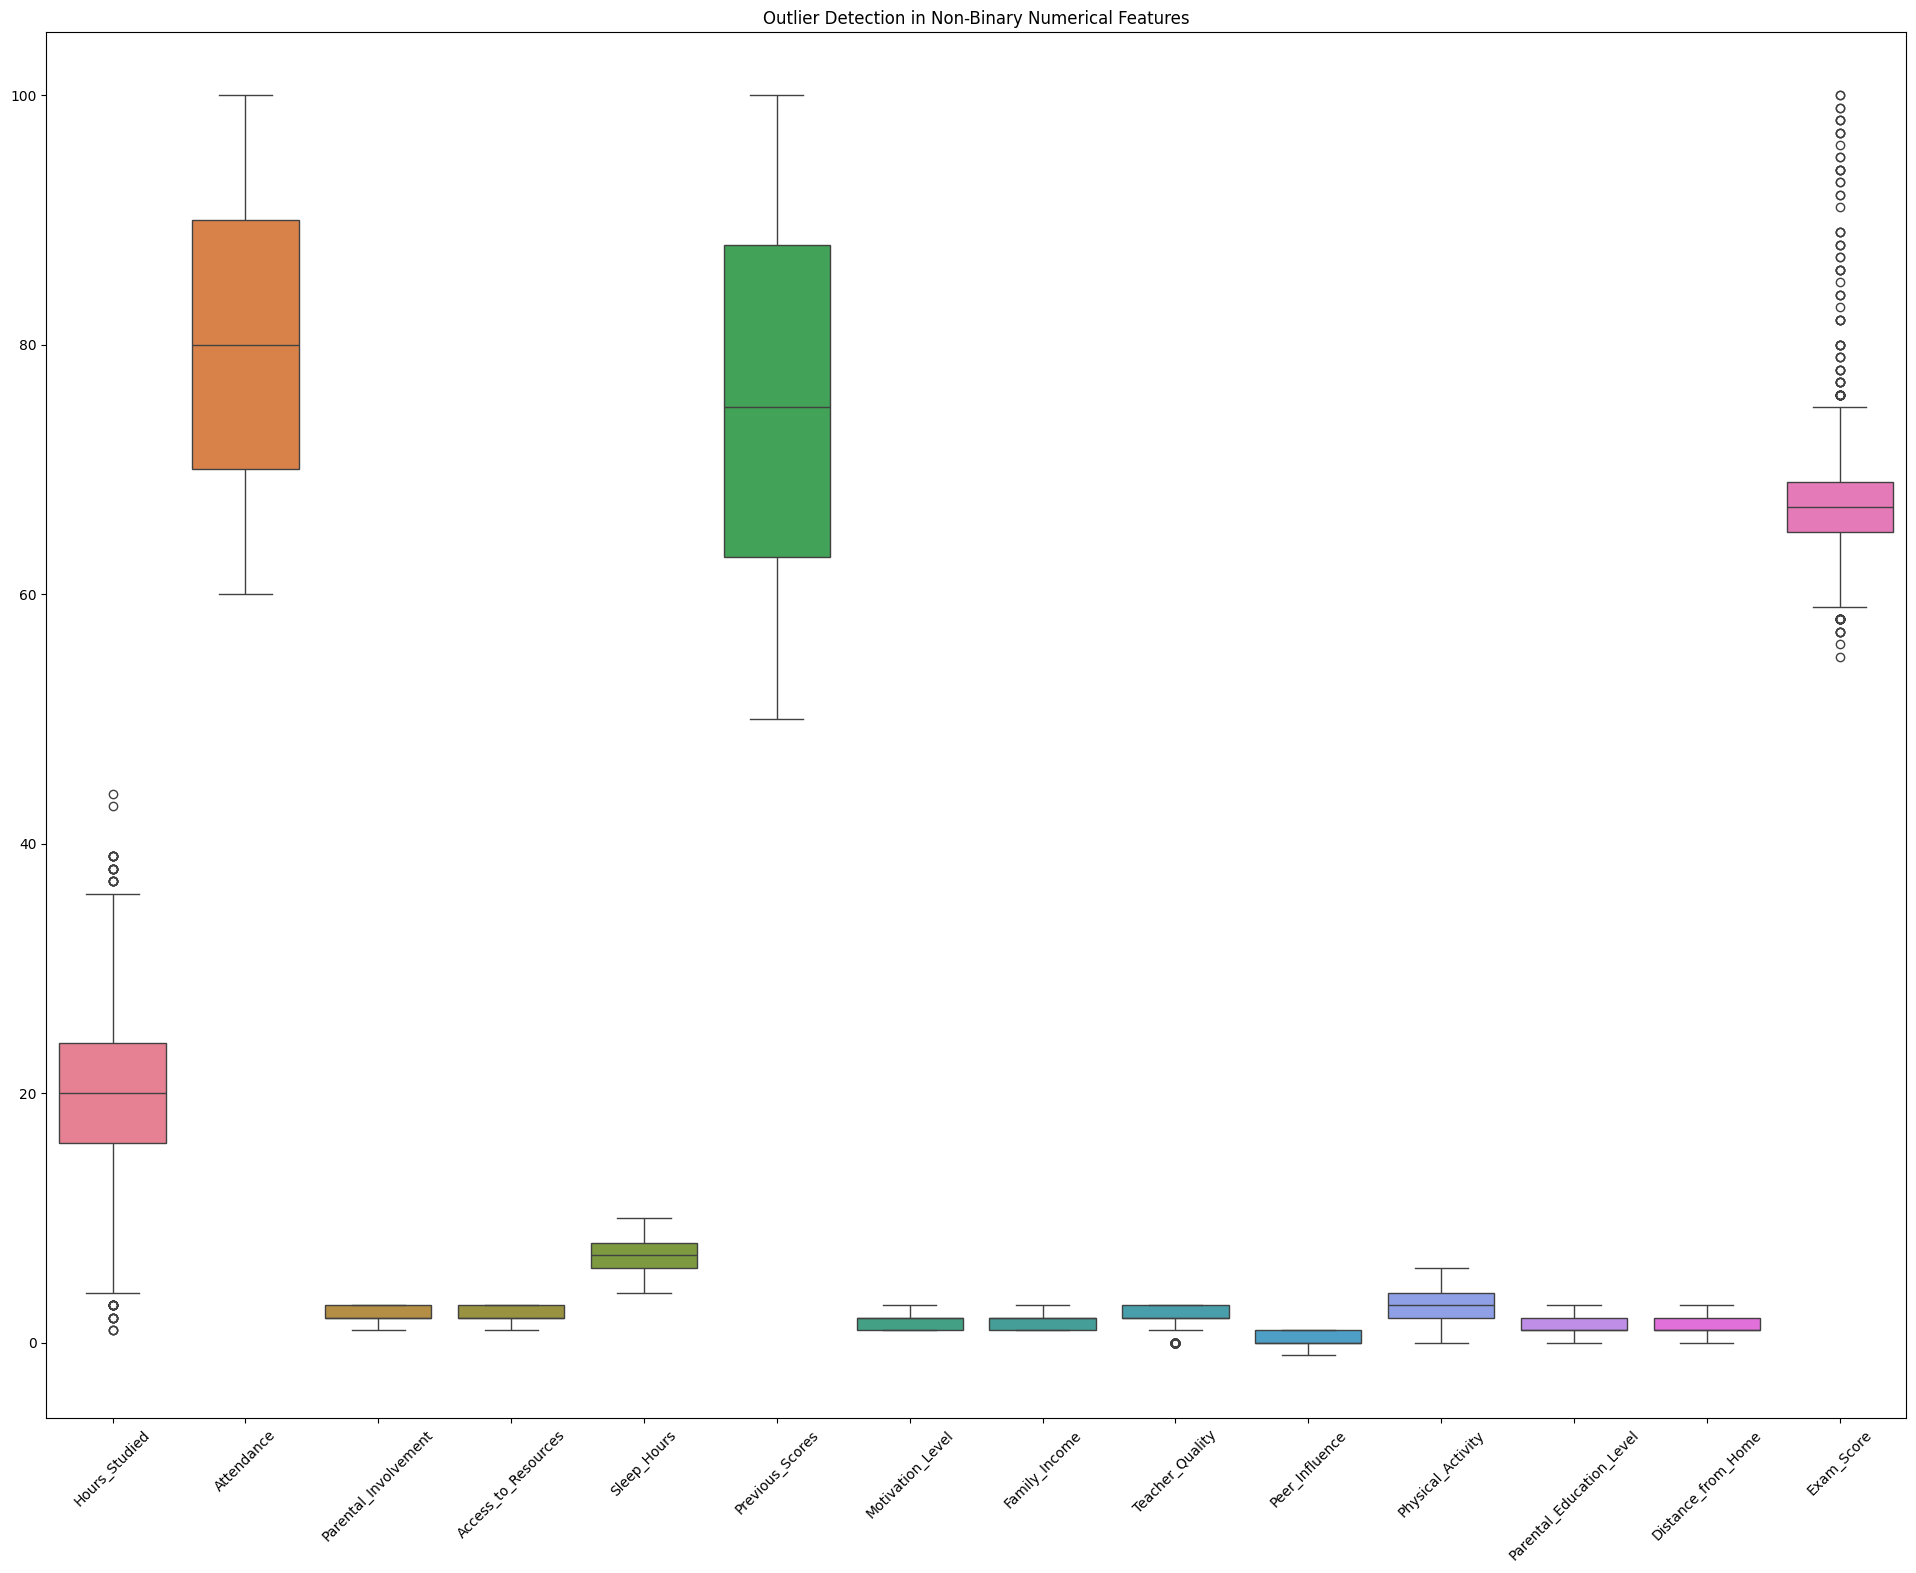

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Filter out binary columns (only keep columns with more than 2 unique values)
non_binary_df = numeric_df.loc[:, numeric_df.nunique() > 2]

# Plot boxplot for non-binary numerical features
plt.figure(figsize=(24, 18))
sns.boxplot(data=non_binary_df)
plt.title("Outlier Detection in Non-Binary Numerical Features")
plt.xticks(rotation=45)
plt.show()

Identified Hours_studied and Exam_score having outliers

##### 3. Removing True Outliers (As a Last Resort) & Getting the Sqaure root of outliers values
- This code removes outliers from the Hours_Studied column using the Interquartile Range (IQR) method by keeping only the values within 1.5 * IQR from the first and third quartiles. It helps reduce the influence of extreme values, improving model stability and accuracy.

In [27]:
# Apply square root transformation
df['Hours_Studied'] = np.sqrt(df['Hours_Studied'])
df['Exam_Score'] = np.sqrt(df['Exam_Score'])

The square root transformation helps reduce the impact of outliers by compressing larger values, making the data more symmetric and less skewed. It is useful for improving model performance, especially when dealing with right-skewed distributions, while also being a safer alternative to log transformation for zero and positive values.

In [28]:
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Hours_Studied'] >= Q1 - 1.5 * IQR) & (df['Hours_Studied'] <= Q3 + 1.5 * IQR)]

In [29]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,4.795832,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,0,8.185353
1,4.358899,64,1,2,0,8,59,1,1,2,2,2,1,-1,4,0,2,2,1,7.810250
2,4.898979,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,0,8.602325
3,5.385165,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,0,8.426150
4,4.358899,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,1,8.366600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,5.000000,69,3,2,0,7,76,2,1,1,3,2,1,1,2,0,1,1,1,8.246211
6603,4.795832,76,3,2,0,8,81,2,1,3,1,3,1,1,2,0,1,1,1,8.306624
6604,4.472136,90,2,1,1,6,65,1,1,3,1,2,1,-1,2,0,3,1,1,8.246211
6605,3.162278,86,3,3,1,6,91,3,1,2,1,2,2,1,3,0,1,3,1,8.246211


In [30]:
def count_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count outliers
hours_outliers = count_outliers_iqr('Hours_Studied')
score_outliers = count_outliers_iqr('Exam_Score')

print(f"Outliers in Hours_Studied: {hours_outliers}")
print(f"Outliers in Exam_Score: {score_outliers}")

Outliers in Hours_Studied: 0
Outliers in Exam_Score: 117


### Getting Correlation Matrix

In [31]:
# Calculate correlation matrix
corr = df.corr()

# Create heatmap using Plotly Express
fig = px.imshow(corr,
                text_auto=".2f",
                color_continuous_scale='Cividis',
                title="Correlation Heatmap")

fig.update_layout(
    width=800,
    height=800,
    title_x=0.5,
    template='plotly_white'
)

fig.show()

We can identify 'Exam Score' as the target variable and analyze its relationship with other features in the dataset.

### Model Building & Analysing (Try different Models and Analysing)

##### 1 . Split Dataset

In [40]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_Strain = scaler.fit_transform(X_train)
joblib.dump(scaler, "scaler.pkl")
X_Stest = scaler.transform(X_test)

In [41]:
# Define base learners
base_models = [
    ('rf', RandomForestRegressor()),
    ('xgb', XGBRegressor()),
    ('knn', KNeighborsRegressor())
]

# Meta learner
meta_model = LinearRegression()


classifiers = [
    LinearRegression(),
    RandomForestRegressor(),
    XGBRegressor(),
    SVR(),
    KNeighborsRegressor(),
    Lasso(),
    StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
]


results = {}
for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name}")

    cv_scores = cross_val_score(model, X_Strain, y_train, cv=5, scoring='r2')
    model.fit(X_Strain, y_train)
    
    y_pred = model.predict(X_Stest)
    results[model_name] = {
        "CV R²": cv_scores.mean(),
        "Test R²": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred)
    }


Training LinearRegression

Training RandomForestRegressor

Training XGBRegressor

Training SVR

Training KNeighborsRegressor

Training Lasso

Training StackingRegressor


In [42]:
results_df = pd.DataFrame(results).T  
print(results_df.to_string(float_format="%.4f")) 

                        CV R²  Test R²    MAE    MSE
LinearRegression       0.7399   0.8489 0.0263 0.0070
RandomForestRegressor  0.6545   0.7462 0.0617 0.0117
XGBRegressor           0.6587   0.7524 0.0536 0.0114
SVR                    0.6772   0.7668 0.0526 0.0107
KNeighborsRegressor    0.4952   0.5741 0.0934 0.0196
Lasso                 -0.0046  -0.0003 0.1659 0.0461
StackingRegressor      0.6924   0.7923 0.0475 0.0096


In [43]:
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

fig = make_subplots(rows=4, cols=1, 
                    subplot_titles=['CV R²', 'Test R²', 'MAE', 'MSE'], 
                    vertical_spacing=0.1)

scores = ['CV R²', 'Test R²', 'MAE', 'MSE']

for i, score in enumerate(scores, 1):
    fig.add_trace(go.Bar(x=results_df['Model'], 
                         y=results_df[score], 
                         name=score,
                        text=[f'{val:.2f}' for val in results_df[score]],
                        textposition='auto',
                        marker=dict(color=px.colors.sequential.Cividis)),
                  row=i, col=1)

fig.update_layout(
    title='Model Comparison',
    xaxis_tickangle=30,
    showlegend=False,
    height=1000, 
)
fig.update_layout(width=800, height=2200,template='plotly_white',title_x=0.5)

fig.show()

Based on the evaluation metrics, the LinearRegression model performs the best, with the highest Test R² of 0.8489 and relatively low MAE and MSE values compared to the other models. Stacking Regressor and SVR also shows good performance with a Test R² of 0.7949 and 0.7668 and relatively low error values, while RandomForestRegressor and XGBRegressor have good Test R² scores but higher MAE and MSE values. Overall, LinearRegression stands out as the best model in this comparison.

### Saving Best Model

In [44]:
lr = LinearRegression()
lr.fit(X_Strain, y_train)

# Save the model
joblib.dump(lr, "linear_regression_model.pkl")

['linear_regression_model.pkl']

###  Load & Validate Model

In [45]:
# Load the model
loaded_model = joblib.load("linear_regression_model.pkl")


y_loaded_pred = loaded_model.predict(X_Stest)

# Evaluate Again
from sklearn.metrics import r2_score, mean_squared_error

print("Loaded Model R²:", r2_score(y_test, y_loaded_pred))
print("Loaded Model MSE:", mean_squared_error(y_test, y_loaded_pred))


Loaded Model R²: 0.8488663653990753
Loaded Model MSE: 0.006966089333839661
